**Užduotis**  Išmokykite ir derinkite gilųjį neuroninį tinklą naudojant dvi sistemasTF/keras ir fast.ai naudojant daugiamatės polinominės regresijos duomenu rinkini.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TensorFlow/Keras Model - Loss: 0.3537, MAE: 0.4550


epoch,train_loss,valid_loss,mae,time
0,2741.560547,2861.118408,37.158573,00:00
1,2500.359619,2240.656982,32.331093,00:00
2,2262.215820,1438.118286,24.671490,00:00
3,1844.493774,897.651184,18.794086,00:00
4,1476.580811,574.788940,15.268425,00:00
5,1157.039429,376.541199,12.221815,00:00
6,937.372803,214.122772,9.106333,00:00
7,747.929626,174.103729,7.989069,00:00
8,628.393738,150.272339,7.643396,00:00
9,513.232422,124.147530,7.091849,00:00


fast.ai Model - Losses: ['-35.1597', '-24.9606', '-85.1795', '-66.7582', '-19.1638', '54.7588', '2.7081', '0.1361', '123.4543', '2.4641', '12.0796', '12.3718', '-27.7714', '-27.4856', '-72.8953', '23.8733', '5.7549', '101.6237', '3.8012', '119.3642', '7.0319', '0.8801', '-58.7816', '-34.8156', '20.9703', '-114.9815', '-16.5677', '-42.4931', '3.9249', '-1.6632', '0.9811', '79.8014', '118.9630', '0.0813', '-40.5926', '13.2296', '48.5147', '35.3168', '-83.3889', '-28.0643', '20.1056', '5.5385', '-29.7981', '82.0591', '3.2135', '-37.1394', '4.0303', '4.7450', '-124.3258', '104.9901', '112.8345', '-7.0969', '8.5483', '13.2749', '1.4015', '-48.0542', '25.3186', '-52.0237', '-81.2624', '140.8830', '-53.8695', '-5.3307', '30.6435', '17.2856', '30.5304', '-4.1229', '0.6697', '-28.3430', '5.0262', '-3.0761', '33.5923', '52.5257', '-0.9336', '-128.3105', '38.7858', '6.9673', '-134.1198', '107.4014', '105.5028', '-62.1095', '10.1297', '-70.6367', '-50.6763', '15.0613', '-2.6906', '7.1078', '60.700

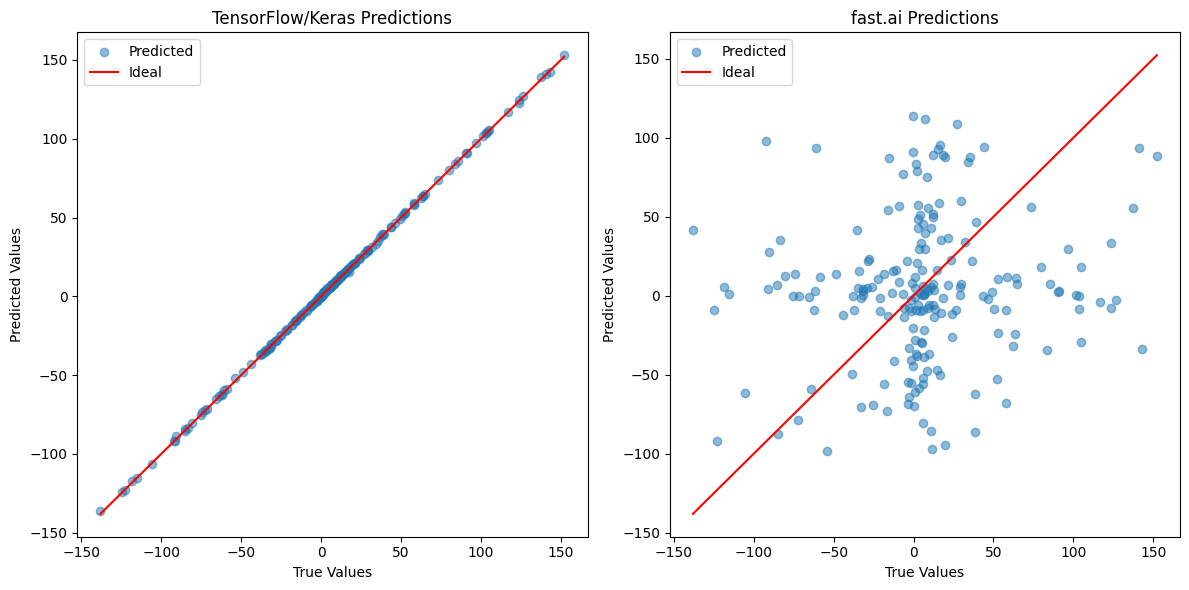

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Generating synthetic data for polynomial regression
def generate_polynomial_data(n_samples=1000, noise=0.1):
    np.random.seed(42)
    X = np.random.uniform(-3, 3, size=(n_samples, 2))  # Two input features
    y = (
        5 * X[:, 0] ** 3 + 2 * X[:, 1] ** 2 - 3 * X[:, 0] * X[:, 1] + noise * np.random.randn(n_samples)
    )
    return X, y

X, y = generate_polynomial_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. TensorFlow/Keras model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build the model
model_tf = Sequential([
    Dense(64, activation="relu", input_dim=2),
    Dense(64, activation="relu"),
    Dense(1)  # Single output
])

model_tf.compile(optimizer=Adam(learning_rate=0.01), loss="mse", metrics=["mae"])

# Train the model
history_tf = model_tf.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0
)

# Evaluate the model
loss_tf, mae_tf = model_tf.evaluate(X_test, y_test, verbose=0)
print(f"TensorFlow/Keras Model - Loss: {loss_tf:.4f}, MAE: {mae_tf:.4f}")

# 3. fast.ai model
from fastai.tabular.all import *

data = np.column_stack([X, y])
df = pd.DataFrame(data, columns=["feature1", "feature2", "target"])

dls = TabularDataLoaders.from_df(df, path=".", y_names="target", cont_names=["feature1", "feature2"],
                                 valid_idx=range(len(X_train), len(X)))

learn = tabular_learner(dls, layers=[64, 64], metrics=mae)

learn.fit_one_cycle(10, lr_max=1e-2)

# Evaluate the model
fastai_preds, fastai_loss = learn.get_preds()
print(f"fast.ai Model - Losses: {[f'{x.item():.4f}' for x in fastai_loss]}")


# 4. Visualization
plt.figure(figsize=(12, 6))

# TensorFlow/Keras results
plt.subplot(1, 2, 1)
plt.scatter(y_test, model_tf.predict(X_test).flatten(), alpha=0.5, label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", label="Ideal")
plt.title("TensorFlow/Keras Predictions")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()

# fast.ai results
plt.subplot(1, 2, 2)
#preds_np = fastai_preds[0].numpy() # This line was selecting only the first row
preds_np = fastai_preds.numpy().flatten() # Select all predictions and flatten to 1D
plt.scatter(y_test, preds_np[:len(y_test)], alpha=0.5, label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", label="Ideal")
plt.title("fast.ai Predictions")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()

plt.tight_layout()
plt.show()


Pagal atliktą palyginimą pasirinkčiau Tensorflow keras modeklį. Šio modelio numatomos reikšmės daug arčiau prie tikrųjų reikšmių.
TensorFlow/Keras suteikia daugiau lankstumo kuriant ir pritaikant modelius, todėl jis tinka sudėtingesniems ir labiau individualizuotiems projektams.
TF/Keras geriau integruojasi su kitais įrankiais.
ensorFlow palaiko daugiau platformų ir aparatūros, pvz., GPU, TPU, mobiliosios platformos ir debesų kompiuterijos paslaugos.
Keras API leidžia visiškai kontroliuoti hiperparametrų nustatymą, optimizatorių konfigūraciją ir sluoksnių architektūrą, kas suteikia daugiau galimybių modelio optimizavimui.